## Prediction of Biological and Economical generations in the country

Issues
For Biological and Economical generations:
- Create a simple Linear Model (year-population dependency) separated males/females
- Create a more sofisticated Linear Model (with Immigration, Emigration, Birthrate, Deathrate) separated males/females - Multiple Linear Regression With scikit-learn
- Compare results with Projection tables
- Create table with three different models: simple Linear Regression, Projection tables,  Multiple Linear Regression and compare them
- Create graphs with predictions 
- Provide comparison and conclusions about predictions both Economical and Biological generations

In [1283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [985]:
#reading data downloaded from Eurostat
#this universal function works with tipycal excel document from the Population data base 
def reading_data(data): 
    df = pd.read_excel(data, skiprows=5, header=4)
    df.drop("SEX/TIME", axis=1, inplace=True)
    df.fillna(0, inplace=True) 
    df.replace(':', 0, inplace=True)
    return df

In [986]:
#reading data using function
data_male = reading_data('demo_pjan_male.xls')
data_female = reading_data('demo_pjan_female.xls')
data = data_male+data_female
data['AGE'] = data_male['AGE'] 

In [987]:
data.head()

AGE     1960     1961     1962     1963     1964     1965  \
0             Total  4565455  4593750  4629624  4665829  4703136  4741008   
1  Less than 1 year    72513    73733    74968    76479    81034    82032   
2            1 year    73100    72301    73583    74898    76299    80870   
3           2 years    73400    73267    72362    73634    74878    76294   
4           3 years    74212    73265    73331    72434    73609    74848   

      1966     1967     1968  ...       2008       2009       2010       2011  \
0  4777015  4817746  4852962  ...  5475791.0  5511451.0  5534738.0  5560628.0   
1    84226    86941    80202  ...    64412.0    65304.0    63178.0    63739.0   
2    81592    84052    86875  ...    65722.0    64890.0    65977.0    63665.0   
3    80677    81550    83960  ...    64993.0    66062.0    65205.0    66235.0   
4    76180    80593    81534  ...    65216.0    65251.0    66248.0    65406.0   

        2012       2013       2014       2015       2016       2017  
0  5580516.0  5602628.0  5627235.0  5659715.0  5707251.0  5748769.0  
1    59306.0    58246.0    56161.0    57130.0    58605.0    62025.0  
2    64168.0    59718.0    58721.0    56748.0    57894.0    59253.0  
3    63842.0    64422.0    60046.0    59134.0    57484.0    58520.0  
4    66358.0    64006.0    64638.0    60389.0    59803.0    57977.0  

[5 rows x 59 columns]

# Biological Generation

Children 0-14

Parents 15-49

Grandparents 50+

In [988]:
data_male.drop(data_male.columns[1:31], axis=1, inplace=True)
data_female.drop(data_female.columns[1:31], axis=1, inplace=True)
data.drop(data.columns[1:31], axis=1, inplace=True)

In [990]:
data.head(3)

AGE       1990       1991       1992       1993       1994  \
0             Total  5135409.0  5146469.0  5162126.0  5180614.0  5196642.0   
1  Less than 1 year    61232.0    63428.0    64323.0    67651.0    67360.0   
2            1 year    58954.0    61415.0    63729.0    64656.0    68005.0   

        1995       1996       1997       1998  ...       2008       2009  \
0  5215718.0  5251027.0  5275121.0  5294860.0  ...  5475791.0  5511451.0   
1    69705.0    70105.0    67791.0    67642.0  ...    64412.0    65304.0   
2    67714.0    70422.0    70575.0    68130.0  ...    65722.0    64890.0   

        2010       2011       2012       2013       2014       2015  \
0  5534738.0  5560628.0  5580516.0  5602628.0  5627235.0  5659715.0   
1    63178.0    63739.0    59306.0    58246.0    56161.0    57130.0   
2    65977.0    63665.0    64168.0    59718.0    58721.0    56748.0   

        2016       2017  
0  5707251.0  5748769.0  
1    58605.0    62025.0  
2    57894.0    59253.0  

[3 rows x 29 columns]

In [1470]:
def bio_generation(data):
    Children = []
    Parents = [] 
    Grandparents = [] 
    d = data[1:16].sum(axis = 0, skipna = True) 
    d2 = data[16:51].sum(axis = 0, skipna = True) 
    d3 = data[51:101].sum(axis = 0, skipna = True) 
    for i in d.iloc[1:]:
        Children.append(i)
    for i in d2.iloc[1:]:
        Parents.append(i)
    for i in d3.iloc[1:]:
        Grandparents.append(i)
    return Children, Parents, Grandparents

In [1471]:
Children = bio_generation(data)[0]
Parents = bio_generation(data)[1] 
Grandparents = bio_generation(data)[2]

Children_male = bio_generation(data_male)[0]
Parents_male = bio_generation(data_male)[1] 
Grandparents_male = bio_generation(data_male)[2]

Children_female = bio_generation(data_female)[0]
Parents_female = bio_generation(data_female)[1] 
Grandparents_female = bio_generation(data_female)[2]

In [1472]:
list_of_years = list(range(1990,2018,1))
list_of_future_years = list(range(2018,2029,1))

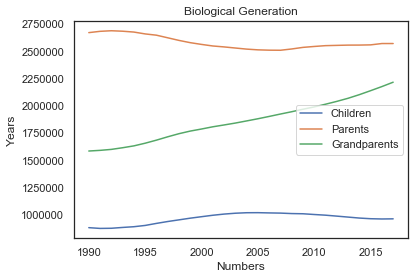

In [1473]:
plt.plot(list_of_years, Children, label = "Children") 
plt.plot(list_of_years, Parents, label = "Parents") 
plt.plot(list_of_years, Grandparents, label = "Grandparents") 
plt.xlabel('Numbers') 
plt.ylabel('Years') 
plt.title('Biological Generation') 
plt.legend() 
plt.show() 

In [1474]:
data_c = [Children,Parents,Grandparents] 
df_cohort = pd.DataFrame(data_c,  index =['Children', 'Parents', 'Grandparents'], columns = list_of_years)
df_cohort

1990       1991       1992       1993       1994  \
Children       880557.0   873630.0   874945.0   882563.0   889251.0   
Parents       2670563.0  2682478.0  2687879.0  2683553.0  2675765.0   
Grandparents  1583965.0  1590019.0  1598935.0  1614118.0  1631226.0   

                   1995       1996       1997       1998       1999  ...  \
Children       900916.0   919680.0   936947.0   952188.0   967643.0  ...   
Parents       2658712.0  2647118.0  2623228.0  2599175.0  2578441.0  ...   
Grandparents  1655679.0  1683801.0  1714514.0  1743038.0  1766988.0  ...   

                   2008       2009       2010       2011       2012  \
Children      1009917.0  1008086.0  1001318.0   995087.0   986458.0   
Parents       2520549.0  2535178.0  2543603.0  2551064.0  2553601.0   
Grandparents  1944594.0  1967377.0  1988928.0  2013577.0  2039533.0   

                   2013       2014       2015       2016       2017  
Children       977596.0   968670.0   962647.0   960274.0   961568.0  
Parents       2555999.0  2556307.0  2558244.0  2570448.0  2570470.0  
Grandparents  2068024.0  2101262.0  2137802.0  2175471.0  2215588.0  

[3 rows x 28 columns]

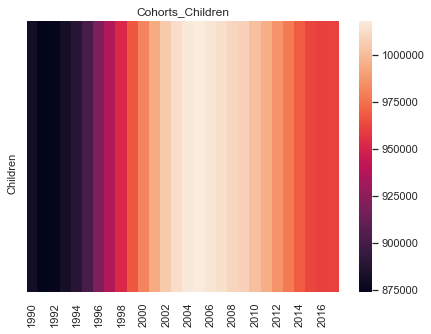

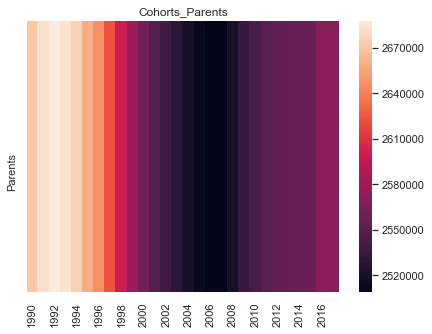

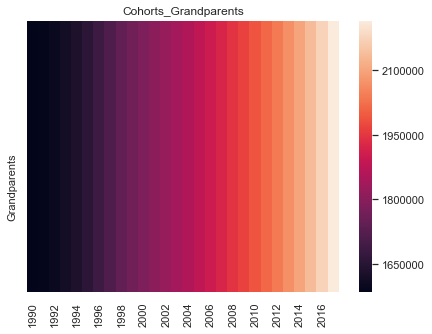

In [1475]:
sns.set(style='white')
plt.figure(figsize=(7, 5))
plt.title('Cohorts_Children')
sns.heatmap(df_cohort[0:1], mask=df_cohort[0:1].isnull(),  fmt='')


plt.figure(figsize=(7, 5))
plt.title('Cohorts_Parents')
sns.heatmap(df_cohort[1:2], mask=df_cohort[1:2].isnull(),  fmt='')

plt.figure(figsize=(7, 5))
plt.title('Cohorts_Grandparents')
sns.heatmap(df_cohort[2:3], mask=df_cohort[2:3].isnull(),  fmt='')

#### About visualisation:
    

## Linear regression - base model

y = α + βx, where α - intercept and β - slope 

In [1476]:
def Linear_model(years, list_of_someone, years_for_prediction):
    X = np.array(years).reshape((-1, 1))  # it need to has one column and as many rows as necessary
    Y = np.array(list_of_someone)
    reg = LinearRegression().fit(X,Y)
    coef = reg.score(X,Y)
    intercept = reg.intercept_
    slope = reg.coef_
    prediction = []
    for i in years_for_prediction:
        prediction.append(i*int(slope)+int(intercept))
    return(prediction)

In [1477]:
Linear_model(list_of_years, Children_male,list_of_future_years)

[522912,
 524980,
 527048,
 529116,
 531184,
 533252,
 535320,
 537388,
 539456,
 541524,
 543592]

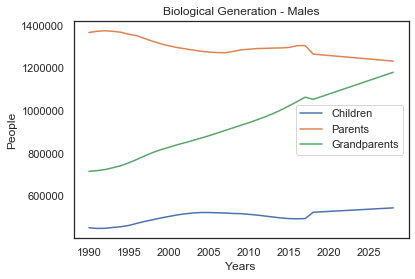

In [1479]:
plt.plot(list_of_years+list_of_future_years, 
         Children_male+Linear_model(list_of_years, Children_male,list_of_future_years), label = "Children") 
plt.plot(list_of_years+list_of_future_years,
         Parents_male+Linear_model(list_of_years, Parents_male,list_of_future_years), label = "Parents") 
plt.plot(list_of_years+list_of_future_years, 
         Grandparents_male+Linear_model(list_of_years, Grandparents_male,list_of_future_years), 
         label = "Grandparents") 
  
plt.xlabel('Years') 
plt.ylabel('People') 

plt.title('Biological Generation - Males') 
  
plt.legend() 
plt.show() 

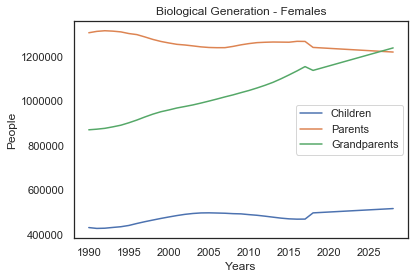

In [1480]:
plt.plot(list_of_years+list_of_future_years, 
         Children_female+Linear_model(list_of_years, Children_female,list_of_future_years), label = "Children") 
plt.plot(list_of_years+list_of_future_years,
         Parents_female+Linear_model(list_of_years, Parents_female,list_of_future_years), label = "Parents") 
plt.plot(list_of_years+list_of_future_years, 
         Grandparents_female+Linear_model(list_of_years, Grandparents_female,list_of_future_years), 
         label = "Grandparents") 
  
plt.xlabel('Years') 
plt.ylabel('People') 

plt.title('Biological Generation - Females') 
  
plt.legend() 
plt.show() 

## Linear regression - model with multile attributes

In [1481]:
#Mortality
mortals = pd.read_excel('demo_death.xls', skiprows=7, header=2)
mortals.drop('GEO/TIME', axis=1, inplace=True)

#Emigration
emigration = pd.read_excel('migr_emi.xls', skiprows=8, header=2)
emigration.drop('GEO/TIME', axis=1, inplace=True)

#Iigration
immigration = pd.read_excel('migr_imm.xls', skiprows=8, header=2)
immigration.drop('GEO', axis=1, inplace=True)
immigration.rename({'AGE/TIME':'AGE'}, axis='columns', inplace=True)
#Unfortubately data sets have different structer, so it will better to download and prepare them one-by-one

In [1482]:
immigration.head()

AGE   1990    1991   1992   1993    1994    1995    1996  \
0  Less than 1 year  976.0  1026.0  989.0  975.0  1093.0  1561.0  1284.0   
1            1 year  675.0   720.0  707.0  705.0   718.0  1087.0   917.0   
2           2 years  542.0   653.0  626.0  601.0   632.0   879.0   844.0   
3           3 years  593.0   562.0  555.0  565.0   627.0  1007.0   784.0   
4           4 years  506.0   587.0  535.0  517.0   587.0   985.0   784.0   

     1997    1998  ...   2008    2009    2010   2011   2012   2013    2014  \
0  1083.0  1098.0  ...  759.0   692.0   697.0  644.0  676.0  658.0   670.0   
1   867.0   839.0  ...  980.0  1108.0  1008.0  957.0  905.0  974.0  1019.0   
2   730.0   718.0  ...  804.0   773.0   746.0  726.0  805.0  815.0   895.0   
3   660.0   678.0  ...  736.0   682.0   668.0  643.0  667.0  756.0   832.0   
4   589.0   649.0  ...  675.0   613.0   627.0  595.0  634.0  689.0   799.0   

     2015    2016    2017  
0   815.0   720.0   666.0  
1  1221.0  1172.0  1016.0  
2  1152.0  1133.0   865.0  
3  1113.0   991.0   857.0  
4  1017.0   963.0   782.0  

[5 rows x 29 columns]

In [1483]:
#Due to all data sets now have edentiacal structure it is possible to use same functions for data processing
def sum_years_for_period(data, x, y):
    df = data[x:y].sum(axis = 0, skipna = True)
    return df

In [1484]:
#Check how it works
sum_years_for_period(mortals, 0, 15)[0:3]
#it works!

AGE     Less than 1 year1 year2 years3 years4 years5 y...
1990                                                  702
1991                                                  680
dtype: object

In [1485]:
#Create table with three generations for each year
mortals_children = sum_years_for_period(mortals, 0, 15)
mortals_parents = sum_years_for_period(mortals, 16, 50)
mortals_grandparents = sum_years_for_period(mortals, 51, 99)

emigration_children = sum_years_for_period(emigration, 0, 15)
emigration_parents = sum_years_for_period(emigration, 16, 50)
emigration_grandparents = sum_years_for_period(emigration, 51, 99)

immigration_children = sum_years_for_period(immigration, 0, 15)
immigration_parents = sum_years_for_period(immigration, 16, 50)
immigration_grandparents = sum_years_for_period(immigration, 51, 99)

In [1486]:
def table_to_list(data):
    df = []
    for i in data[1:]:
        df.append(i)
    return df 

In [1487]:
#CPrepare data for regression
death_children_per_year = table_to_list(mortals_children)
death_parents_per_year = table_to_list(mortals_parents)
death_grandparents_per_year = table_to_list(mortals_grandparents)

emigration_children_per_year = table_to_list(emigration_children)
emigration_parents_per_year = table_to_list(emigration_parents)
emigration_grandparents_per_year = table_to_list(emigration_grandparents)

immigration_children_per_year = table_to_list(immigration_children)
immigration_parents_per_year = table_to_list(immigration_parents)
immigration_grandparents_per_year = table_to_list(immigration_grandparents)


We also remember about population lists

- Children = bio_generation(data)[0]

- Parents = bio_generation(data)[1] 

- Grandparents = bio_generation(data)[2]



- list_of_years = list(range(1990,2018,1))

- list_of_future_years = list(range(2018,2029,1))

In [1488]:
def preparing_X_LR(*args):
    dataX = [list(i) for i in zip(*args)]
    return dataX

def preparing_Y_LR(y):
    dataY = np.array(y).reshape(-1, 1)
    return dataY

In [1489]:
Children_x = preparing_X_LR(list_of_years)
Children_y = preparing_Y_LR(Children)

Parents_x = preparing_X_LR(list_of_years, death_parents_per_year, 
                            emigration_parents_per_year, immigration_parents_per_year)
Parents_y = preparing_Y_LR(Parents)

Grandparents_x = preparing_X_LR(list_of_years, death_grandparents_per_year, 
                                emigration_grandparents_per_year, immigration_grandparents_per_year)
Grandparents_y = preparing_Y_LR(Grandparents)

In [1490]:
def LR_multile(x, y, years_for_prediction):
    reg = LinearRegression().fit(x, y)
    coef = reg.score(x, y)
    intercept = reg.intercept_
    slope = reg.coef_
    prediction = []
    for i in years_for_prediction:
        prediction.append(i*(slope.sum())+intercept)
    return prediction

In [1491]:
prediction_for_children = LR_multile(Children_x, Children_y, list_of_future_years)
prediction_for_parents = LR_multile(Parents_x, Parents_y, list_of_future_years)
prediction_for_grandparents = LR_multile(Grandparents_x, Grandparents_y, list_of_future_years)

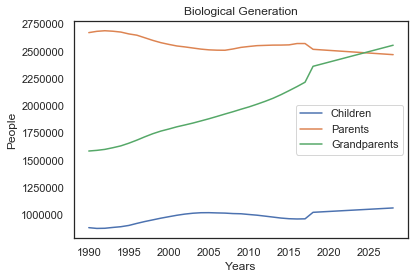

In [1493]:
plt.plot(list_of_years+list_of_future_years, 
         Children+prediction_for_children, label = "Children") 
plt.plot(list_of_years+list_of_future_years,
         Parents+prediction_for_parents, label = "Parents") 
plt.plot(list_of_years+list_of_future_years, 
         Grandparents+prediction_for_grandparents, label = "Grandparents") 
  
plt.xlabel('Years') 
plt.ylabel('People') 

plt.title('Biological Generation') 
  
plt.legend() 
plt.show() 

## Projection tables

In [509]:
#Download and prepare data for comparison 
projection_table = pd.read_excel("4DM465_Economic Demography_Denmark_update.xlsx", 
                                 sheet_name='Projection',skiprows=10, header=2)

In [510]:
projection_table.head()

x   Sx2017  Px=lx+1/Lx      Sx,2018      Sx,2019      Sx,2020  \
0  < 1 year  31797.5    0.999327  30969.51602  31258.23562  31533.31953   
1    1 year  31295.0    0.999775  31776.10603  30948.67913  31512.10330   
2   2 years  30296.5    0.999850  31287.95091  31768.94857  30941.70806   
3   3 years  29953.0    0.999851  30291.96605  31283.26859  31764.19427   
4   4 years  30427.5    0.999935  29948.52361  30287.43901  31278.59340   

       Sx,2021      Sx,2022      Sx,2023      Sx,2024  ...    Sx,2023.1  \
0  31765.62956  31929.78056  32012.93749  32004.37736  ...  31733.78176   
1  31744.25703  31908.29759  31991.39856  31982.84420  ...  31637.95313   
2  31505.00531  31737.10675  31901.11036  31984.19262  ...  31471.51536   
3  30937.07755  31500.29050  31732.35721  31896.33628  ...  31236.98522   
4  31759.44720  30932.45409  31495.58288  31727.61490  ...  30961.23539   

     Sx,2024.1  fx  Nx,2018  Nx,2019  Nx,2020  Nx,2021  Nx,2022  Nx,2023  \
0  31725.29628 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1  31720.35002 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2  31634.14652 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  31467.11211 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4  31233.70558 NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   Nx,2024  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 29 columns]

In [569]:
projection_table[15:16]

x   Sx2017  Px=lx+1/Lx      Sx,2018      Sx,2019      Sx,2020  \
15  15 years  34377.0    0.999756  34224.51996  34332.99942  34250.52464   

        Sx,2021      Sx,2022      Sx,2023      Sx,2024  ...    Sx,2023.1  \
15  34553.90528  34695.33736  34842.75806  34488.95853  ...  32902.96366   

      Sx,2024.1        fx   Nx,2018  Nx,2019   Nx,2020   Nx,2021   Nx,2022  \
15  32477.56756  0.091722  2.976337  3.00408  3.011096  3.026457  3.018524   

     Nx,2023  Nx,2024  
15  3.017928  2.97891  

[1 rows x 29 columns]

In [1330]:
sum_pt_c = projection_table[0:15].sum(axis = 0, skipna = True)
sum_pt_p  = projection_table[15:50].sum(axis = 0, skipna = True)
sum_pt_g = projection_table[50:99].sum(axis = 0, skipna = True)

In [1345]:
sum_pt_c['Sx,2018']

489647.67449000006

In [1343]:
sum_pt['Sx,2018.1']

1175007.2697853001

In [1325]:
sum_children = sum_pt['Sx,2018'] + sum_pt['Sx,2018.1']


2260876.3253481

In [1382]:
def get_all_genders(data):
    projection_table_male = []
    projection_table_female = []
    projection_table = 0
    for i in data[['Sx,2018','Sx,2019','Sx,2020','Sx,2021','Sx,2022','Sx,2023','Sx,2024']]:
        projection_table_male.append(i)
        
        for j in data[['Sx,2018.1','Sx,2019.1','Sx,2020.1','Sx,2021.1','Sx,2022.1','Sx,2023.1','Sx,2024.1']]:
            projection_table_female.append(i)
        
    projection_table = [x + y for x, y in zip(projection_table_male, projection_table_female)]
    return projection_table 
    

In [1383]:
projection_table_children = get_all_genders(sum_pt_c)
projection_table_parents = get_all_genders(sum_pt_p)
projection_table_grandparents = get_all_genders(sum_pt_g)

In [1385]:
data_test = [prediction_for_children[0:7], projection_table_children, 
             prediction_for_parents[0:7],  projection_table_parents, 
             prediction_for_grandparents[0:7], projection_table_grandparents]
             

In [1417]:
df_compare = pd.DataFrame(data_test, columns = list_of_future_years[0:7], 
                          index = ['Children_LR','Children_Projection', 'Parents_LR',
           'Parents_Projection', 'Grandparents_LR','Grandparents_Projection',])

df_compare[0:6] = df_compare[0:6].astype(int)
df_compare.T

Children_LR  Children_Projection  Parents_LR  Parents_Projection  \
2018      1021356               979295     2410235             2592782   
2019      1025368               976154     2405646             2587131   
2020      1029379               973646     2401056             2582211   
2021      1033390               971024     2396467             2576709   
2022      1037401               968357     2391878             2570412   
2023      1041412               965544     2387288             2565052   
2024      1045423               962985     2382699             2560134   

      Grandparents_LR  Grandparents_Projection  
2018          2361545                  2171738  
2019          2380891                  2183957  
2020          2400237                  2194634  
2021          2419584                  2205473  
2022          2438930                  2216515  
2023          2458276                  2226010  
2024          2477623                  2233958

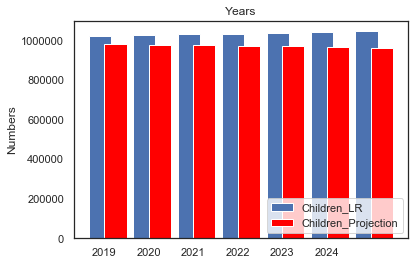

In [1457]:
labels = list_of_future_years[0:7]
LR = df_compare.T['Children_LR']
Projection = df_compare.T['Children_Projection']
x = np.arange(len(labels))  
width = 0.5  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/5, LR, width, label='Children_LR')
rects2 = ax.bar(x + width/2, Projection, width, label='Children_Projection', color="red")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Years')

ax.set_xticklabels(labels)

ax.legend(loc=4)
plt.show()

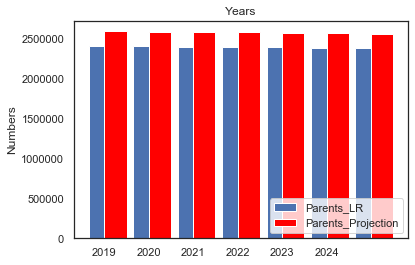

In [1458]:
labels = list_of_future_years[0:7]
LR = df_compare.T['Parents_LR']
Projection = df_compare.T['Parents_Projection']
x = np.arange(len(labels))  
width = 0.5  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/5, LR, width, label='Parents_LR')
rects2 = ax.bar(x + width/2, Projection, width, label='Parents_Projection', color="red")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Years')

ax.set_xticklabels(labels)

ax.legend(loc=4)
plt.show()

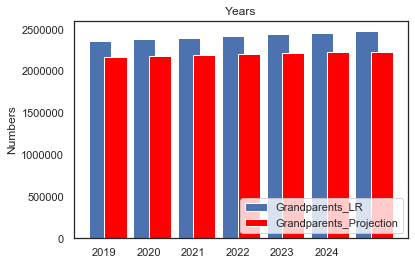

In [1459]:
labels = list_of_future_years[0:7]
LR = df_compare.T['Grandparents_LR']
Projection = df_compare.T['Grandparents_Projection']
x = np.arange(len(labels))  
width = 0.5  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/5, LR, width, label='Grandparents_LR')
rects2 = ax.bar(x + width/2, Projection, width, label='Grandparents_Projection', color="red")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Years')

ax.set_xticklabels(labels)

ax.legend(loc=4)
plt.show()

# Economical Generation

- pre-productive 0-19 
- productive 20-64 
- post-productive 65+

In [1467]:
def econom_generation(data):
    pre_productive = []
    productive = [] 
    post_productive = [] 
    d = data[1:21].sum(axis = 0, skipna = True) 
    d2 = data[21:67].sum(axis = 0, skipna = True) 
    d3 = data[67:101].sum(axis = 0, skipna = True) 
    for i in d.iloc[1:]:
        pre_productive.append(i)
    for i in d2.iloc[1:]:
        productive.append(i)
    for i in d3.iloc[1:]:
        post_productive.append(i)
    return pre_productive, productive, post_productive

In [1495]:
pre_productive = econom_generation(data)[0]
productive = econom_generation(data)[1] 
post_productive = econom_generation(data)[2]

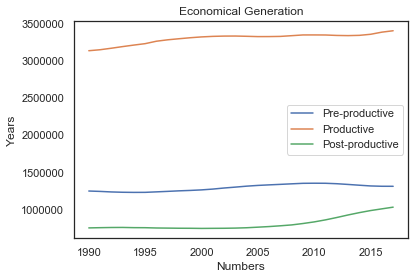

In [1496]:
plt.plot(list_of_years, pre_productive, label = "Pre-productive") 
plt.plot(list_of_years, productive, label = "Productive") 
plt.plot(list_of_years, post_productive, label = "Post-productive") 
plt.xlabel('Numbers') 
plt.ylabel('Years') 
plt.title('Economical Generation') 
plt.legend() 
plt.show() 

In [1497]:
data_e = [pre_productive, productive, post_productive] 
df_visio = pd.DataFrame(data_c,  index =['Pre-productive', 'Productive', 'Post-productive'], columns = list_of_years)
df_visio 

1990       1991       1992       1993       1994  \
Pre-productive    880557.0   873630.0   874945.0   882563.0   889251.0   
Productive       2670563.0  2682478.0  2687879.0  2683553.0  2675765.0   
Post-productive  1583965.0  1590019.0  1598935.0  1614118.0  1631226.0   

                      1995       1996       1997       1998       1999  ...  \
Pre-productive    900916.0   919680.0   936947.0   952188.0   967643.0  ...   
Productive       2658712.0  2647118.0  2623228.0  2599175.0  2578441.0  ...   
Post-productive  1655679.0  1683801.0  1714514.0  1743038.0  1766988.0  ...   

                      2008       2009       2010       2011       2012  \
Pre-productive   1009917.0  1008086.0  1001318.0   995087.0   986458.0   
Productive       2520549.0  2535178.0  2543603.0  2551064.0  2553601.0   
Post-productive  1944594.0  1967377.0  1988928.0  2013577.0  2039533.0   

                      2013       2014       2015       2016       2017  
Pre-productive    977596.0   968670.0   962647.0   960274.0   961568.0  
Productive       2555999.0  2556307.0  2558244.0  2570448.0  2570470.0  
Post-productive  2068024.0  2101262.0  2137802.0  2175471.0  2215588.0  

[3 rows x 28 columns]

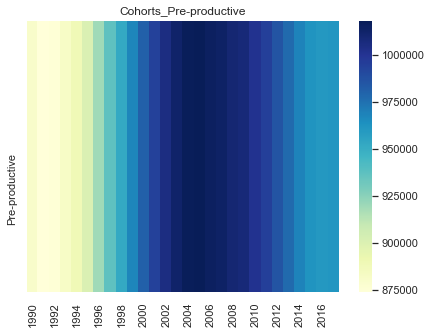

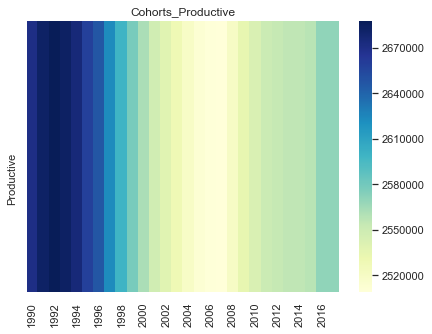

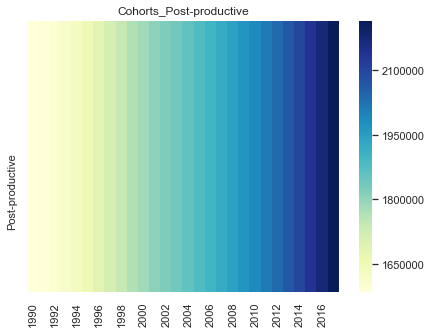

In [1500]:
sns.set(style='white')
plt.figure(figsize=(7, 5))
plt.title('Cohorts_Pre-productive')
sns.heatmap(df_visio[0:1], mask=df_visio[0:1].isnull(), fmt='', cmap="YlGnBu")


plt.figure(figsize=(7, 5))
plt.title('Cohorts_Productive')
sns.heatmap(df_visio[1:2], mask=df_visio[1:2].isnull(), fmt='', cmap="YlGnBu")

plt.figure(figsize=(7, 5))
plt.title('Cohorts_Post-productive')
sns.heatmap(df_visio[2:3], mask=df_visio[2:3].isnull(), fmt='',cmap="YlGnBu")